In [3]:
# import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sys
sys.path.append('../src')
from fantasy_stats_from_pbp import *
from retreive_adp_data import *

In [15]:
# read in df from nfl fast R data collected
pbp = pd.read_pickle('../data/raw/nfl_pbp_data.pkl')
pbp.head()

,aborted_play,air_epa,air_wpa,air_yards,assist_tackle,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tackle_2_player_id,assist_tackle_2_player_name,...,xyac_success,yac_epa,yac_wpa,yardline_100,yards_after_catch,yards_gained,ydsnet,ydstogo,year,yrdln
0,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,30.0,NaN,0.0,6.0,0,1999,ARI 30
1,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,77.0,NaN,0.0,6.0,10,1999,PHI 23
2,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,77.0,NaN,1.0,6.0,10,1999,PHI 23
3,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,76.0,NaN,0.0,6.0,9,1999,PHI 24
4,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,81.0,NaN,10.0,6.0,14,1999,PHI 19


In [16]:
josh_allen_id = '00-0034857'
josh_allen_stats = create_player_stats(josh_allen_id, pbp)
josh_allen_stats['fantasy_pts'] = josh_allen_stats.apply(lambda row: calculate_espn_ppr_score(row), axis=1)
josh_allen_stats

c:\Users\irela\Documents\NSS_Projects\ff-draft-optimizer\notebooks\../src\fantasy_stats_from_pbp.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pbp['two_pt'] = np.where((pbp['two_point_conv_result']=='success'), 1, 0)


,id,reception,passing_yards,pass_touchdown,rush_touchdown,interception,fumble_lost,rushing_yards,two_pt,receiving_yards,receive_touchdown,fantasy_pts
season,,,,,,,,,,,,
2018,00-0034857,0,2044.0,10.0,8.0,12.0,2.0,631.0,1.0,0.0,0.0,206.86
2019,00-0034857,0,3089.0,20.0,9.0,9.0,4.0,510.0,3.0,0.0,0.0,288.56
2020,00-0034857,1,4544.0,37.0,8.0,10.0,6.0,421.0,0.0,12.0,1.0,396.06
2021,00-0034857,0,4168.0,34.0,6.0,15.0,3.0,700.0,3.0,0.0,0.0,378.72
2022,00-0034857,0,4029.0,32.0,7.0,13.0,5.0,746.0,2.0,0.0,0.0,373.76
2023,00-0034857,0,3947.0,27.0,15.0,16.0,3.0,457.0,3.0,0.0,0.0,369.58
2024,00-0034857,0,3731.0,28.0,12.0,6.0,2.0,531.0,1.0,0.0,0.0,372.34


In [17]:
#all_players = calculate_all_players_season_stats(save_to_csv=True, csv_filepath='../data/processed/season_stats_05_17.csv')
all_players = pd.read_csv('../data/processed/season_stats_05_17.csv')
rosters = pd.read_csv('../data/raw/rosters.csv', index_col=0).reset_index(drop=True)
all_players = pd.merge(all_players, rosters, how='left', left_on=['id', 'season'], right_on=['gsis_id', 'season'])
all_players.head()

C:\Users\irela\AppData\Local\Temp\ipykernel_31188\3239920645.py:3: DtypeWarning: Columns (4,31) have mixed types. Specify dtype option on import or set low_memory=False.
  rosters = pd.read_csv('../data/raw/rosters.csv', index_col=0).reset_index(drop=True)


,season,reception,passing_yards,pass_touchdown,rush_touchdown,interception,fumble_lost,rushing_yards,two_pt,receiving_yards,...,smart_id,entry_year,rookie_year,draft_club,ngs_position,week,game_type,status_description_abbr,football_name,draft_number
0,1999,0,1276.0,7.0,0.0,9.0,6.0,33.0,0.0,0.0,...,32005045-4454-3972-51b8-d0b994ae7160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,0,1047.0,2.0,0.0,8.0,0.0,68.0,0.0,0.0,...,32005045-4454-3972-51b8-d0b994ae7160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2001,0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,32005045-4454-3972-51b8-d0b994ae7160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2002,0,134.0,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,32005045-4454-3972-51b8-d0b994ae7160,1991.0,1991.0,NaN,NaN,18.0,WC,A01,Doug,NaN
4,2003,0,16.0,0.0,0.0,0.0,0.0,-7.0,0.0,0.0,...,32005045-4454-3972-51b8-d0b994ae7160,1991.0,1991.0,NaN,NaN,19.0,DIV,A01,Doug,NaN


In [18]:
unnecessary_cols = ['espn_id', 'sportradar_id', 'yahoo_id',
       'rotowire_id', 'pff_id', 'pfr_id', 'fantasy_data_id', 'sleeper_id',
       'esb_id', 'gsis_it_id', 'smart_id', 'entry_year', 'draft_club', 'ngs_position', 'week',
       'game_type', 'status_description_abbr', 'football_name',
       'draft_number']
all_players = all_players[[col for col in all_players.columns if col not in unnecessary_cols]]
all_players.head()

,season,reception,passing_yards,pass_touchdown,rush_touchdown,interception,fumble_lost,rushing_yards,two_pt,receiving_yards,...,first_name,last_name,birth_date,height,weight,college,gsis_id,years_exp,headshot_url,rookie_year
0,1999,0,1276.0,7.0,0.0,9.0,6.0,33.0,0.0,0.0,...,Douglas,Pederson,1968-01-31,75.0,216.0,NaN,00-0012726,NaN,https://static.www.nfl.com/image/private/f_aut...,NaN
1,2000,0,1047.0,2.0,0.0,8.0,0.0,68.0,0.0,0.0,...,Douglas,Pederson,1968-01-31,75.0,216.0,NaN,00-0012726,NaN,https://static.www.nfl.com/image/private/f_aut...,NaN
2,2001,0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,Douglas,Pederson,1968-01-31,75.0,220.0,NaN,00-0012726,NaN,https://static.www.nfl.com/image/private/f_aut...,NaN
3,2002,0,134.0,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,Doug,Pederson,1968-01-31,75.0,220.0,NaN,00-0012726,11.0,https://static.www.nfl.com/image/private/f_aut...,1991.0
4,2003,0,16.0,0.0,0.0,0.0,0.0,-7.0,0.0,0.0,...,Doug,Pederson,1968-01-31,75.0,220.0,NaN,00-0012726,12.0,https://static.www.nfl.com/image/private/f_aut...,1991.0


In [19]:
fantasy_positions = ['QB', 'RB', 'TE', 'WR'] # Not taking kickers or defense into account
all_players = all_players[all_players['position'].isin(fantasy_positions)]

In [20]:
#josh_allen_id = '00-0034857'
#jamar_chase_id = '00-0036900'

## EDA

How are fantasy points distributed by position? (e.g., RBs vs. WRs)

In [21]:
all_players.groupby('position')['fantasy_pts'].describe()

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
QB,2012.0,99.673300,105.649874,-7.28,7.69,56.26,182.405,417.08
RB,3690.0,81.493409,86.483618,-8.00,12.20,50.30,128.050,481.10
TE,916.0,79.987031,68.740352,-2.00,20.90,61.95,123.800,330.90
WR,4323.0,93.190062,85.058646,-6.00,18.60,70.40,149.600,412.90


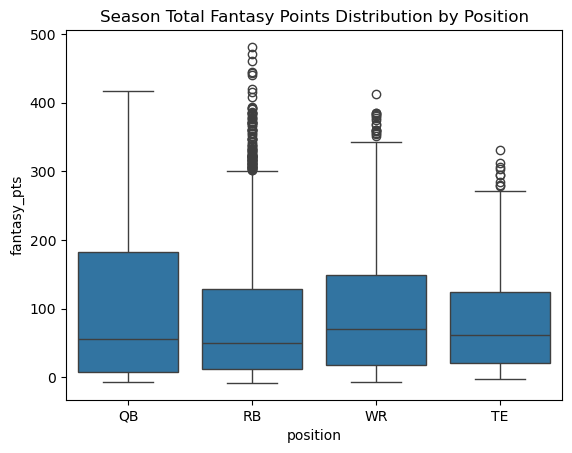

In [22]:
sns.boxplot(data=all_players, x='position', y='fantasy_pts')
plt.title('Season Total Fantasy Points Distribution by Position')
plt.show()

Which positions have the most year-to-year consistency in performance?

In [23]:
all_players['ff_pts_prev_year'] = all_players.groupby('id')['fantasy_pts'].shift(1)
all_players['ff_pts_diff'] = all_players['fantasy_pts'] - all_players['ff_pts_prev_year']
all_players.head()

,season,reception,passing_yards,pass_touchdown,rush_touchdown,interception,fumble_lost,rushing_yards,two_pt,receiving_yards,...,birth_date,height,weight,college,gsis_id,years_exp,headshot_url,rookie_year,ff_pts_prev_year,ff_pts_diff
0,1999,0,1276.0,7.0,0.0,9.0,6.0,33.0,0.0,0.0,...,1968-01-31,75.0,216.0,NaN,00-0012726,NaN,https://static.www.nfl.com/image/private/f_aut...,NaN,NaN,NaN
1,2000,0,1047.0,2.0,0.0,8.0,0.0,68.0,0.0,0.0,...,1968-01-31,75.0,216.0,NaN,00-0012726,NaN,https://static.www.nfl.com/image/private/f_aut...,NaN,52.34,-11.66
2,2001,0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,1968-01-31,75.0,220.0,NaN,00-0012726,NaN,https://static.www.nfl.com/image/private/f_aut...,NaN,40.68,-40.78
3,2002,0,134.0,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,1968-01-31,75.0,220.0,NaN,00-0012726,11.0,https://static.www.nfl.com/image/private/f_aut...,1991.0,-0.10,9.36
4,2003,0,16.0,0.0,0.0,0.0,0.0,-7.0,0.0,0.0,...,1968-01-31,75.0,220.0,NaN,00-0012726,12.0,https://static.www.nfl.com/image/private/f_aut...,1991.0,9.26,-9.32


In [24]:
all_players.groupby('position')['ff_pts_diff'].describe()

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
QB,1612.0,-4.286179,82.299962,-387.0,-46.925,-2.07,32.735,406.72
RB,2725.0,-7.045930,73.558615,-394.8,-45.100,-2.10,24.200,332.80
TE,781.0,-0.681485,53.301115,-182.0,-29.900,0.00,26.200,205.40
WR,3433.0,-5.446391,67.852323,-307.6,-44.900,-3.00,31.900,325.80


Seems that Tight Ends have the greatest mean in ff pts difference year to year. Tight Ends also have the lowest standard deviation in points year to year.

What is the correlation between a player’s fantasy finish and:
ADP?
Team offensive stats?

In [25]:
#adp_data = adp_data_all_years(2024, split=True, save_to_csv=True, csv_filepath='../data/raw/adp_data.csv')
adp_data = pd.read_csv('../data/raw/adp_data.csv')
adp_data.head()

,Rank,Player Team (Bye),POS,ESPN,Sleeper,NFL,RTSports,FFC,AVG,season,position,position_rank,full_name,team,bye_week
0,1,Le'Veon Bell,RB1,NaN,NaN,NaN,1.0,NaN,1.5,2015,RB,1.0,Le'Veon Bell,NaN,NaN
1,2,Adrian Peterson,RB2,NaN,NaN,NaN,2.0,NaN,1.8,2015,RB,2.0,Adrian Peterson,NaN,NaN
2,3,Antonio Brown,WR1,NaN,NaN,NaN,4.0,NaN,3.8,2015,WR,1.0,Antonio Brown,NaN,NaN
3,4,Jamaal Charles,RB3,NaN,NaN,NaN,5.0,NaN,4.0,2015,RB,3.0,Jamaal Charles,NaN,NaN
4,5,Eddie Lacy,RB4,NaN,NaN,NaN,3.0,NaN,4.0,2015,RB,4.0,Eddie Lacy,NaN,NaN


In [67]:
#adp_season_df = merge_adp_all_players(adp_data, all_players)
#adp_season_df.to_csv('../data/processed/adp_season.csv', index=False)
adp_season_df = pd.read_csv('../data/processed/adp_season.csv')
adp_season_df.head()

,id,team_all_players,position,season,reception,passing_yards,pass_touchdown,rush_touchdown,interception,fumble_lost,...,ff_pts_diff,Rank,ESPN,AVG,position_rank,bye_week,position_season_end_rank,season_end_rank,position_season_end_rank_diff,season_end_rank_diff
0,00-0012726,PHI,QB,1999,0,1276.0,7.0,0.0,9.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,44,198,NaN,NaN
1,00-0012726,CLE,QB,2000,0,1047.0,2.0,0.0,8.0,0.0,...,-11.66,NaN,NaN,NaN,NaN,NaN,41,204,NaN,NaN
2,00-0012726,GB,QB,2001,0,0.0,0.0,0.0,0.0,0.0,...,-40.78,NaN,NaN,NaN,NaN,NaN,70,341,NaN,NaN
3,00-0012726,GB,QB,2002,0,134.0,1.0,0.0,0.0,0.0,...,9.36,NaN,NaN,NaN,NaN,NaN,54,274,NaN,NaN
4,00-0012726,GB,QB,2003,0,16.0,0.0,0.0,0.0,0.0,...,-9.32,NaN,NaN,NaN,NaN,NaN,75,340,NaN,NaN


In [68]:
adp_season_df = adp_season_df.rename(columns={'team_all_players':'team'})
adp_season_df['team_total_season_fantasy_pts'] = adp_season_df.groupby(['team', 'season'])['fantasy_pts'].transform('sum')

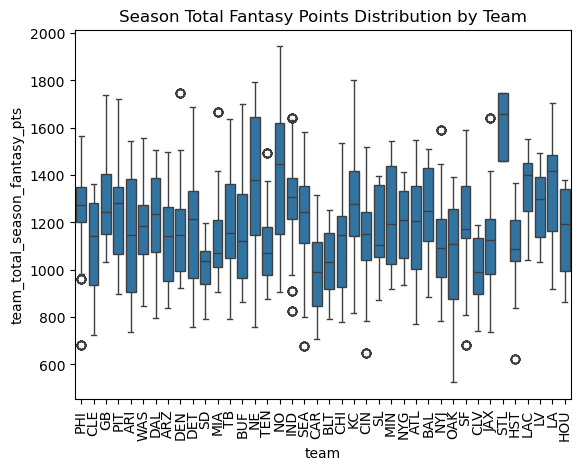

In [69]:
sns.boxplot(data=adp_season_df, x='team', y='team_total_season_fantasy_pts')
plt.title('Season Total Fantasy Points Distribution by Team')
plt.xticks(rotation=90)
plt.show()

In [70]:
corr = adp_season_df[['fantasy_pts', 'AVG', 'team_total_season_fantasy_pts', 'season_end_rank']]
corr.corr()

,fantasy_pts,AVG,team_total_season_fantasy_pts,season_end_rank
fantasy_pts,1.000000,-0.621828,0.141909,-0.934482
AVG,-0.621828,1.000000,-0.097623,0.653696
team_total_season_fantasy_pts,0.141909,-0.097623,1.000000,-0.051080
season_end_rank,-0.934482,0.653696,-0.051080,1.000000


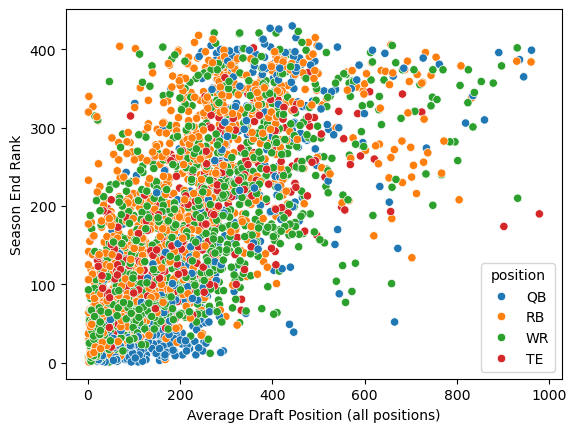

In [71]:
sns.scatterplot(data=adp_season_df, x='AVG', y='season_end_rank', hue='position')
plt.xlabel('Average Draft Position (all positions)')
plt.ylabel('Season End Rank')
plt.show()

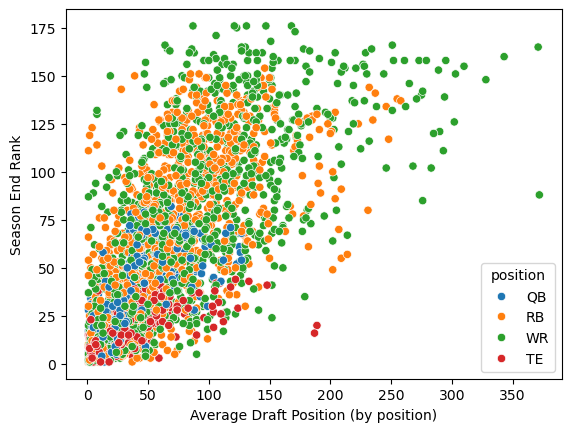

In [72]:
sns.scatterplot(data=adp_season_df, x='position_rank', y='position_season_end_rank', hue='position')
plt.xlabel('Average Draft Position (by position)')
plt.ylabel('Season End Rank')
plt.show()

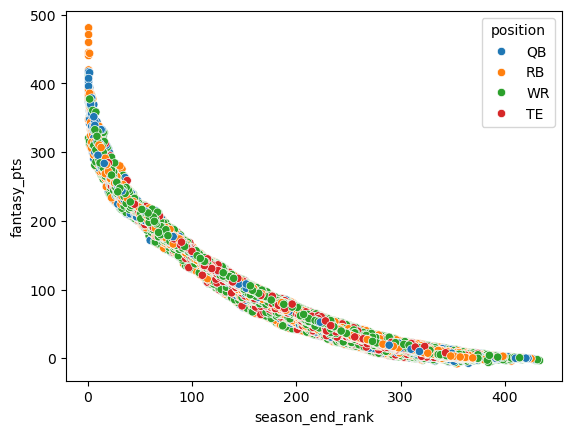

In [73]:
sns.scatterplot(data=adp_season_df, x='season_end_rank', y='fantasy_pts', hue='position')
plt.show()

What’s the average point drop-off between draft rounds?

In [94]:
# Say 12 teams (Could narrow this down)
num_teams = 12
total_slots_per_team = 14

"""
QB
RB
RB
WR
WR
TE
FLEX

BENCH x7

14 total slots per fantasy team
"""
adp_season_df['ESPN_reranked'] = adp_season_df.sort_values(['ESPN', 'fantasy_pts'], ascending=[True, False]).groupby('season').cumcount() + 1
adp_season_df['estimated_draft_round'] = ((adp_season_df['ESPN_reranked'].dropna() - 1) / (num_teams)).astype(int) + 1
adp_season_df['estimated_draft_round'] = np.where(adp_season_df['estimated_draft_round'] > total_slots_per_team, np.nan, adp_season_df['estimated_draft_round'].astype(int))
df_2024 = adp_season_df.loc[adp_season_df['season'] == 2024].copy()
df_2024.head()

,id,team,position,season,reception,passing_yards,pass_touchdown,rush_touchdown,interception,fumble_lost,...,AVG,position_rank,bye_week,position_season_end_rank,season_end_rank,position_season_end_rank_diff,season_end_rank_diff,team_total_season_fantasy_pts,ESPN_reranked,estimated_draft_round
3864,00-0023459,NYJ,QB,2024,0,3623.0,24.0,0.0,10.0,2.0,...,136.2,18.0,NaN,16,40,-2.0,-96.2,1301.68,90,8.0
4844,00-0026158,IND,QB,2024,0,1497.0,11.0,0.0,7.0,4.0,...,317.5,39.0,10.0,36,179,-3.0,-138.5,981.60,178,NaN
5227,00-0026498,LA,QB,2024,0,3762.0,20.0,0.0,8.0,2.0,...,150.6,20.0,6.0,18,54,-2.0,-96.6,1164.48,129,11.0
5360,00-0026300,BAL,QB,2024,0,17.0,0.0,0.0,0.0,0.0,...,446.5,66.0,14.0,65,366,-1.0,-80.5,1508.88,197,NaN
6077,00-0027973,CAR,QB,2024,0,989.0,7.0,0.0,6.0,0.0,...,410.0,60.0,11.0,41,214,-19.0,-196.0,986.44,204,NaN


In [95]:
adp_season_df.groupby('estimated_draft_round')['fantasy_pts'].describe()

,count,mean,std,min,25%,50%,75%,max
estimated_draft_round,,,,,,,,
1.0,312.0,302.122115,68.562230,13.00,282.075,309.89,339.665,481.10
2.0,312.0,257.167051,51.608178,14.10,251.695,269.60,281.000,373.76
3.0,312.0,234.213269,44.475230,9.60,226.175,242.50,255.125,407.40
4.0,312.0,218.358013,43.440111,49.70,210.575,222.69,233.025,412.90
5.0,312.0,195.326987,45.896751,26.10,192.425,203.23,211.300,369.58
6.0,312.0,184.322885,43.514622,2.00,177.900,187.80,195.050,383.26
7.0,312.0,170.053333,43.648825,-0.20,160.315,172.20,179.705,396.06
8.0,312.0,153.280577,43.808628,5.80,147.395,157.85,165.150,415.68
9.0,312.0,143.223782,41.131957,3.20,133.125,146.05,153.150,305.36


Text(0.5, 1.0, 'Fantasy Points Distribution by Estimated Draft Round')

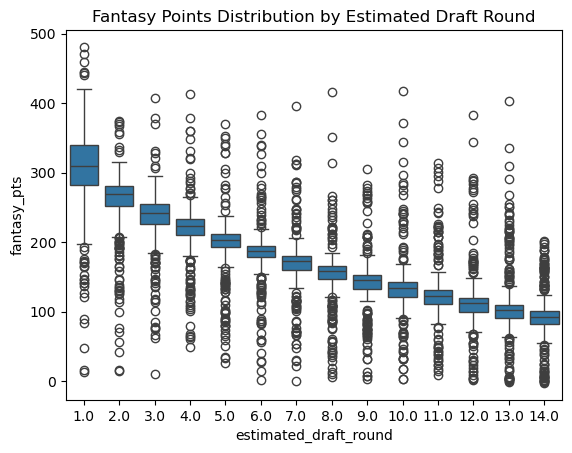

In [103]:
sns.boxplot(data=adp_season_df, x='estimated_draft_round', y='fantasy_pts')
plt.title('Fantasy Points Distribution by Estimated Draft Round')

In [96]:
avg_drop_off = adp_season_df.groupby('estimated_draft_round')['fantasy_pts'].mean().reset_index()
avg_drop_off['previous_round_avg_fantasy_pts'] = avg_drop_off['fantasy_pts'].shift(1)
avg_drop_off['avg_drop_off'] = avg_drop_off['fantasy_pts'] - avg_drop_off['previous_round_avg_fantasy_pts']
avg_drop_off[['estimated_draft_round', 'avg_drop_off']]

,estimated_draft_round,avg_drop_off
0,1.0,NaN
1,2.0,-44.955064
2,3.0,-22.953782
3,4.0,-15.855256
4,5.0,-23.031026
5,6.0,-11.004103
6,7.0,-14.269551
7,8.0,-16.772756
8,9.0,-10.056795
9,10.0,-7.267179


Which positions/players are historically most over- or under-projected?

What % of drafted players miss significant time?

How much does injury risk affect fantasy point variability?

Are injury-prone players still top scorers when healthy?

How does team offensive rank affect player fantasy outcomes?

Do players perform better/worse when switching teams?

What impact does a new quarterback or head coach have?

How often do sleepers (late-round picks) end up as top-20 players?

Which draft positions yield the best total fantasy performance?

Are there trends or biases in who gets drafted too early or too late?

How close were preseason projections to actual outcomes? What level of variance exists in player outcomes vs. projections?

### Expanding Josh Allen's stats

In [97]:
ja = all_players[all_players['id']==josh_allen_id]
ja

,season,reception,passing_yards,pass_touchdown,rush_touchdown,interception,fumble_lost,rushing_yards,two_pt,receiving_yards,...,birth_date,height,weight,college,gsis_id,years_exp,headshot_url,rookie_year,ff_pts_prev_year,ff_pts_diff
10453,2018,0,2044.0,10.0,8.0,12.0,2.0,631.0,1.0,0.0,...,1996-05-21,77.0,240.0,Wyoming,00-0034857,0.0,https://static.www.nfl.com/image/private/f_aut...,2018.0,NaN,NaN
10454,2019,0,3089.0,20.0,9.0,9.0,4.0,510.0,3.0,0.0,...,1996-05-21,77.0,237.0,Wyoming,00-0034857,1.0,https://static.www.nfl.com/image/private/f_aut...,2018.0,206.86,81.70
10455,2020,1,4544.0,37.0,8.0,10.0,6.0,421.0,0.0,12.0,...,1996-05-21,77.0,237.0,Wyoming,00-0034857,2.0,https://static.www.nfl.com/image/private/f_aut...,2018.0,288.56,107.50
10456,2021,0,4168.0,34.0,6.0,15.0,3.0,700.0,3.0,0.0,...,1996-05-21,77.0,237.0,Wyoming,00-0034857,3.0,https://static.www.nfl.com/image/private/f_aut...,2018.0,396.06,-17.34
10457,2022,0,4029.0,32.0,7.0,13.0,5.0,746.0,2.0,0.0,...,1996-05-21,77.0,237.0,Wyoming,00-0034857,4.0,https://static.www.nfl.com/image/private/f_aut...,2018.0,378.72,-4.96
10458,2023,0,3947.0,27.0,15.0,16.0,3.0,457.0,3.0,0.0,...,1996-05-21,77.0,237.0,Wyoming,00-0034857,5.0,https://static.www.nfl.com/image/private/f_aut...,2018.0,373.76,-4.18
10459,2024,0,3731.0,28.0,12.0,6.0,2.0,531.0,1.0,0.0,...,1996-05-21,77.0,237.0,Wyoming,00-0034857,6.0,https://static.www.nfl.com/image/upload/f_auto...,2018.0,369.58,2.76


In [98]:
ja_df = pd.merge(ja, rosters, how='left', left_on=['id', 'season'], right_on=['gsis_id', 'season'])
ja_df

,season,reception,passing_yards,pass_touchdown,rush_touchdown,interception,fumble_lost,rushing_yards,two_pt,receiving_yards,...,smart_id,entry_year,rookie_year_y,draft_club,ngs_position,week,game_type,status_description_abbr,football_name,draft_number
0,2018,0,2044.0,10.0,8.0,12.0,2.0,631.0,1.0,0.0,...,3200414c-4c52-9264-bedc-c4ddaf201fe7,2018.0,2018.0,BUF,QB,17.0,REG,A01,Josh,7.0
1,2019,0,3089.0,20.0,9.0,9.0,4.0,510.0,3.0,0.0,...,3200414c-4c52-9264-bedc-c4ddaf201fe7,2018.0,2018.0,BUF,QB,18.0,WC,A01,Josh,7.0
2,2020,1,4544.0,37.0,8.0,10.0,6.0,421.0,0.0,12.0,...,3200414c-4c52-9264-bedc-c4ddaf201fe7,2018.0,2018.0,BUF,QB,20.0,CON,A01,Josh,7.0
3,2021,0,4168.0,34.0,6.0,15.0,3.0,700.0,3.0,0.0,...,3200414c-4c52-9264-bedc-c4ddaf201fe7,2018.0,2018.0,BUF,QB,20.0,DIV,A01,Josh,7.0
4,2022,0,4029.0,32.0,7.0,13.0,5.0,746.0,2.0,0.0,...,3200414c-4c52-9264-bedc-c4ddaf201fe7,2018.0,2018.0,BUF,QB,20.0,DIV,A01,Josh,7.0
5,2023,0,3947.0,27.0,15.0,16.0,3.0,457.0,3.0,0.0,...,3200414c-4c52-9264-bedc-c4ddaf201fe7,2018.0,2018.0,BUF,QB,20.0,DIV,A01,Josh,7.0
6,2024,0,3731.0,28.0,12.0,6.0,2.0,531.0,1.0,0.0,...,3200414c-4c52-9264-bedc-c4ddaf201fe7,2018.0,2018.0,BUF,QB,21.0,CON,A01,Josh,7.0


In [99]:
next_gen_pass = pd.read_csv('../data/raw/next_gen_passing.csv', index_col=0).reset_index(drop=True)
next_gen_pass.head()

,season,season_type,week,player_display_name,player_position,team_abbr,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,...,completion_percentage,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,player_gsis_id,player_first_name,player_last_name,player_jersey_number,player_short_name
0,2016,REG,0,Drew Brees,QB,NO,2.424238,6.195456,7.550997,-1.355541,...,69.985141,64.783965,5.201176,20.815996,59.033016,00-0020531,Drew,Brees,9,D.Brees
1,2016,REG,0,Joe Flacco,QB,BAL,2.566823,5.187294,7.720937,-2.533644,...,64.880952,64.367218,0.513734,20.995448,62.710625,00-0026158,Joe,Flacco,5,J.Flacco
2,2016,REG,0,Russell Wilson,QB,SEA,2.606104,7.167756,9.240646,-2.072890,...,64.652015,59.305514,5.346501,23.137055,61.277761,00-0029263,Russell,Wilson,3,R.Wilson
3,2016,REG,0,Josh McCown,QB,CLE,2.800770,7.360889,10.353818,-2.992929,...,54.545455,59.587162,-5.041707,23.423919,55.424624,00-0021206,Josh,McCown,13,NaN
4,2016,REG,0,Eli Manning,QB,NYG,2.527473,5.437374,8.191990,-2.754616,...,63.043478,63.397823,-0.354345,20.702627,57.601267,00-0022803,Eli,Manning,10,E.Manning


In [100]:
ja_ng = next_gen_pass[next_gen_pass['player_gsis_id']==josh_allen_id]
ja_ng.head()

,season,season_type,week,player_display_name,player_position,team_abbr,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,...,completion_percentage,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,player_gsis_id,player_first_name,player_last_name,player_jersey_number,player_short_name
1173,2018,REG,0,Josh Allen,QB,BUF,3.217784,6.478698,11.029344,-4.550646,...,52.812500,60.919193,-8.106693,23.969448,67.257523,00-0034857,Joshua,Allen,17,J.Allen
1201,2018,REG,1,Josh Allen,QB,BUF,3.724800,11.066667,15.266667,-4.200000,...,40.000000,48.891475,-8.891475,27.437653,48.794920,00-0034857,Joshua,Allen,17,J.Allen
1241,2018,REG,2,Josh Allen,QB,BUF,3.504394,7.142222,10.744545,-3.602323,...,54.545455,63.544038,-8.998583,23.379660,63.935646,00-0034857,Joshua,Allen,17,J.Allen
1266,2018,REG,3,Josh Allen,QB,BUF,2.699636,3.708667,8.293182,-4.584515,...,68.181818,64.890220,3.291598,20.755469,52.429551,00-0034857,Joshua,Allen,17,J.Allen
1308,2018,REG,4,Josh Allen,QB,BUF,3.013848,4.710625,9.206061,-4.495436,...,48.484848,64.934962,-16.450113,24.352180,57.575886,00-0034857,Joshua,Allen,17,J.Allen


In [101]:
ja_ng_filtered = ja_ng[ja_ng['week']<18]
ja_ng_grouped = ja_ng_filtered.groupby('season').agg({'player_position':'first',
                                                      'team_abbr':'first',
                                                      'avg_time_to_throw':'mean',
                                                      'avg_completed_air_yards':'mean',
                                                      'avg_intended_air_yards':'mean',
                                                      'avg_air_yards_differential':'mean',
                                                      'aggressiveness':'mean',
                                                        # More to add...
                                                      })
ja_ng_grouped

,player_position,team_abbr,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,aggressiveness
season,,,,,,,
2018,QB,BUF,3.217519,6.671415,11.151912,-4.480497,14.229480
2019,QB,BUF,2.851657,6.486776,9.481988,-2.995211,15.239672
2020,QB,BUF,3.045675,6.904674,8.833025,-1.928351,13.308553
2021,QB,BUF,2.919952,6.954294,8.837729,-1.883435,11.936116
2022,QB,BUF,2.856187,7.453386,9.359086,-1.905700,12.621350
2023,QB,BUF,2.890902,5.936266,8.551637,-2.615371,14.445016
2024,QB,BUF,2.892080,5.383275,8.326768,-2.943493,17.051663


In [102]:
ja_df = pd.merge(ja_df, next_gen_pass, how='left', left_on=['id', 'season'], right_on=['player_gsis_id', 'season'])
ja_df

,season,reception,passing_yards,pass_touchdown,rush_touchdown,interception,fumble_lost,rushing_yards,two_pt,receiving_yards,...,completion_percentage,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,player_gsis_id,player_first_name,player_last_name,player_jersey_number,player_short_name
0,2018,0,2044.0,10.0,8.0,12.0,2.0,631.0,1.0,0.0,...,52.812500,60.919193,-8.106693,23.969448,67.257523,00-0034857,Joshua,Allen,17,J.Allen
1,2018,0,2044.0,10.0,8.0,12.0,2.0,631.0,1.0,0.0,...,40.000000,48.891475,-8.891475,27.437653,48.794920,00-0034857,Joshua,Allen,17,J.Allen
2,2018,0,2044.0,10.0,8.0,12.0,2.0,631.0,1.0,0.0,...,54.545455,63.544038,-8.998583,23.379660,63.935646,00-0034857,Joshua,Allen,17,J.Allen
3,2018,0,2044.0,10.0,8.0,12.0,2.0,631.0,1.0,0.0,...,68.181818,64.890220,3.291598,20.755469,52.429551,00-0034857,Joshua,Allen,17,J.Allen
4,2018,0,2044.0,10.0,8.0,12.0,2.0,631.0,1.0,0.0,...,48.484848,64.934962,-16.450113,24.352180,57.575886,00-0034857,Joshua,Allen,17,J.Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,2024,0,3731.0,28.0,12.0,6.0,2.0,531.0,1.0,0.0,...,55.172414,56.745687,-1.573274,24.757465,60.458993,00-0034857,Joshua,Allen,17,J.Allen
125,2024,0,3731.0,28.0,12.0,6.0,2.0,531.0,1.0,0.0,...,59.259259,57.271931,1.987328,20.651440,45.627335,00-0034857,Joshua,Allen,17,J.Allen
126,2024,0,3731.0,28.0,12.0,6.0,2.0,531.0,1.0,0.0,...,76.923077,64.237265,12.685812,21.267522,47.495419,00-0034857,Joshua,Allen,17,J.Allen
127,2024,0,3731.0,28.0,12.0,6.0,2.0,531.0,1.0,0.0,...,72.727273,74.503033,-1.775760,18.502121,39.714664,00-0034857,Joshua,Allen,17,J.Allen
